In [9]:
import pandas as pd
from darts import TimeSeries

In [10]:
weather_data = pd.read_excel('arso-scraper/ljp-2022-2024.xlsx', index_col=0)
weather_data.index = pd.to_datetime(weather_data['time'])
weather_data.drop(columns=['time'], inplace=True)
weather_data.rename(columns={'Letališče Jožeta Pučnika Ljubljana/mean T': 'T'}, inplace=True)
weather_data

,T
time,
2022-01-01 00:00:00,-2.7
2022-01-01 00:10:00,-2.6
2022-01-01 00:20:00,-2.7
2022-01-01 00:30:00,-3.0
2022-01-01 00:40:00,-3.0
...,...
2024-11-13 23:20:00,1.8
2024-11-13 23:30:00,1.7
2024-11-13 23:40:00,1.6


In [11]:
df = weather_data.copy()
df

,T
time,
2022-01-01 00:00:00,-2.7
2022-01-01 00:10:00,-2.6
2022-01-01 00:20:00,-2.7
2022-01-01 00:30:00,-3.0
2022-01-01 00:40:00,-3.0
...,...
2024-11-13 23:20:00,1.8
2024-11-13 23:30:00,1.7
2024-11-13 23:40:00,1.6


In [19]:
weather_data_api = pd.read_csv('weather.csv', index_col=0)
weather_data_api['date'] = pd.to_datetime(weather_data_api['date'])
weather_data_api['date'] = weather_data_api['date'].apply(lambda t: t.replace(tzinfo=None))
weather_data_api.index = weather_data_api['date']
weather_data_api.drop(columns=['date'], inplace=True)
# weather_data.rename(columns={'Letališče Jožeta Pučnika Ljubljana/mean T': 'T'}, inplace=True)
weather_data_api

,temperature_2m
date,
2022-01-01 00:00:00,3.939
2022-01-01 01:00:00,3.689
2022-01-01 02:00:00,3.539
2022-01-01 03:00:00,3.439
2022-01-01 04:00:00,3.289
...,...
2022-12-31 19:00:00,4.824
2022-12-31 20:00:00,4.674
2022-12-31 21:00:00,4.824


In [29]:
merge

,T,temperature_2m
date,,
2022-01-01 00:00:00,-2.7,3.939
2022-01-01 01:00:00,-3.1,3.689
2022-01-01 02:00:00,-3.9,3.539
2022-01-01 03:00:00,-2.7,3.439
2022-01-01 04:00:00,-3.2,3.289
...,...,...
2022-12-31 19:00:00,5.9,4.824
2022-12-31 20:00:00,4.6,4.674
2022-12-31 21:00:00,4.3,4.824


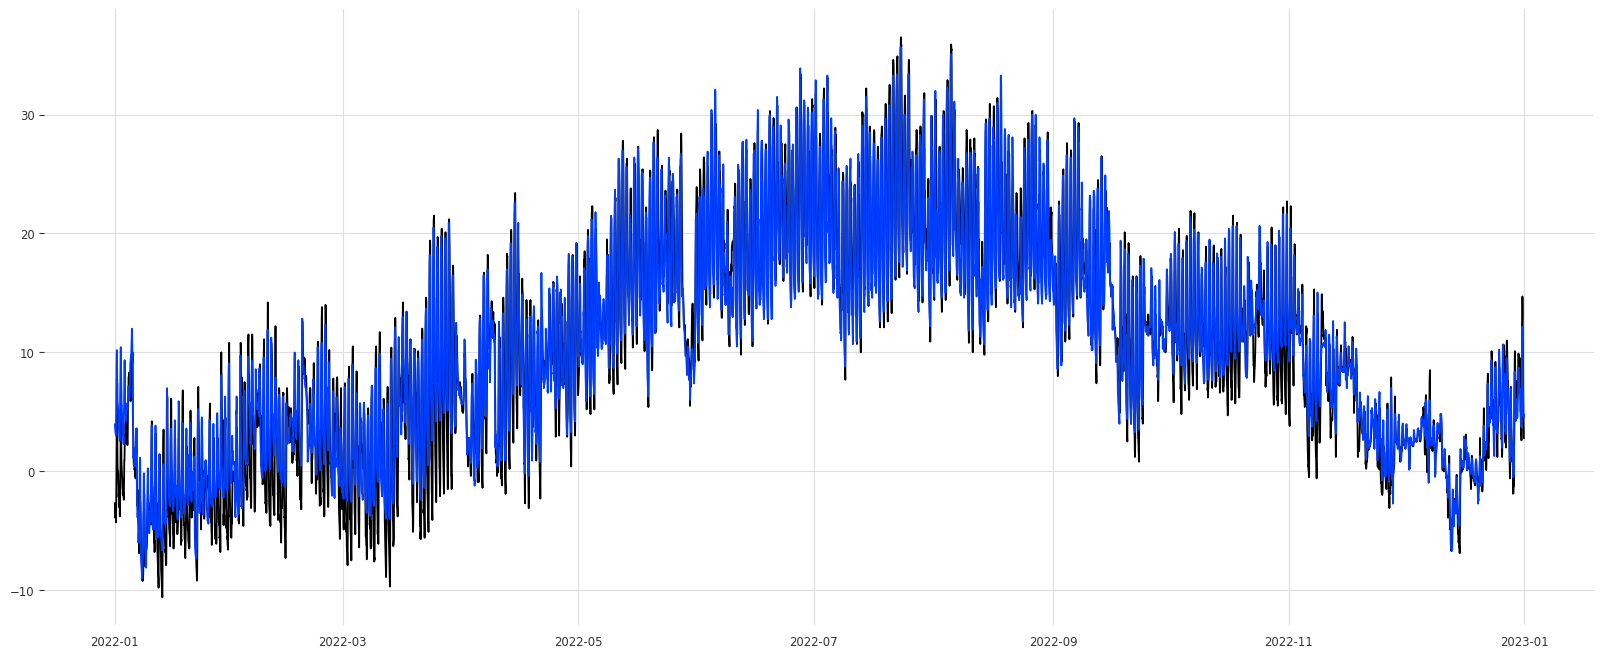

In [30]:
import matplotlib.pyplot as plt

merge = pd.merge(weather_data, weather_data_api, how='right', left_index=True, right_index=True)

fig, axs = plt.subplots(1, 1, sharex='col', figsize=(20, 8))
axs.plot(merge)